## Visualization in Python, Seaborn

### Reading and manipulating data via Python Pandas

In [2]:
import pandas as pd # convention is to include pd 'alias' for reference purposes 
import numpy as np
%matplotlib inline
#import matplotlib.pyplot as plt
import seaborn as sns # https://pypi.python.org/pypi/seaborn

In [3]:
# Function to generate mock data
def CreateHomeworkData(rows):
    hw_data = [] # empty list
    
    # id
    cust_num = np.arange(1, 41, 1)
    # Family Size
    family_size = np.random.poisson(5, size = rows)
    # Income
    income = np.random.normal(loc = 70000, scale = 8000, size = rows)            
    # Category Spending
    category_spending = np.random.uniform(low = 1000, high = 4000, size = rows)
    # survey
    completed_survey = np.random.randint(low = 0, high = 2, size = rows)
    # Time Zone
    time_zones_values = ['Pacific', 'Mountain', 'Central', 'Eastern']
    time_zones = [time_zones_values[np.random.randint(low = 0, high = len(time_zones_values))] for i in range(rows)]
    # Spending
    spending = category_spending + family_size * 110 + completed_survey * 100
    
    hw_data.extend(zip(cust_num, spending, time_zones, category_spending, completed_survey, income, family_size)) 
        
    return hw_data

In [4]:
np.random.seed(3) # set seed to create reproducible results
dataset = CreateHomeworkData(40)
hw_df = pd.DataFrame(data=dataset, columns=['Cust_Num', 'Spending', 'Zone', 'Category_Spending', 'Completed_Survey', 
                                                 'Income', 'Family_Size'])

In [5]:
hw_df.head()

,Cust_Num,Spending,Zone,Category_Spending,Completed_Survey,Income,Family_Size
0,1,4362.132602,Central,3702.132602,0,65300.172233,6
1,2,3226.362734,Central,3006.362734,0,76277.400860,2
2,3,3696.497030,Mountain,3366.497030,0,75344.744178,3
3,4,4017.218593,Mountain,3687.218593,0,68900.582219,3
4,5,2300.566827,Pacific,1750.566827,0,64345.028212,5


The graphs shows the spending of people based on their income across different Zones.

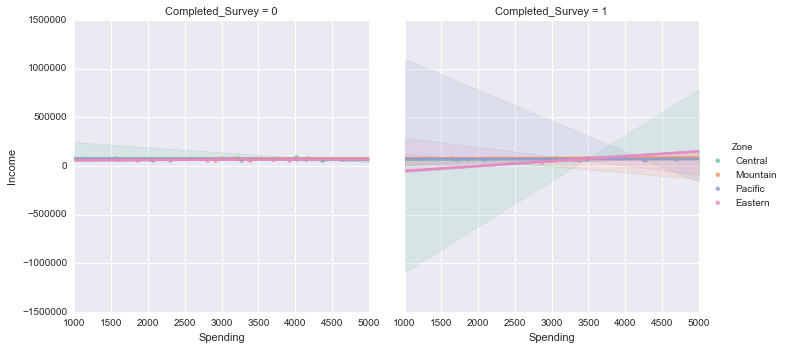

In [6]:
sns.lmplot(x='Spending', y='Income', hue = 'Zone', col='Completed_Survey', data=hw_df , palette="Set2")

2. Created a distribution plot showing the univariate distribution in the spending Amount.

C:\Users\Yash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


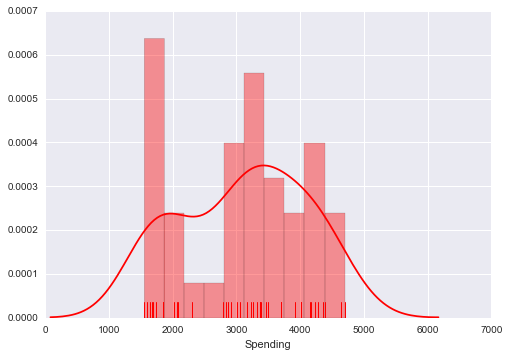

In [11]:
sns.distplot(hw_df.Spending , rug=True, bins = 10 ,color='red') # rug includes marks along the x-axis 

3. Created a boxplot showing the income of the people across different zones. 

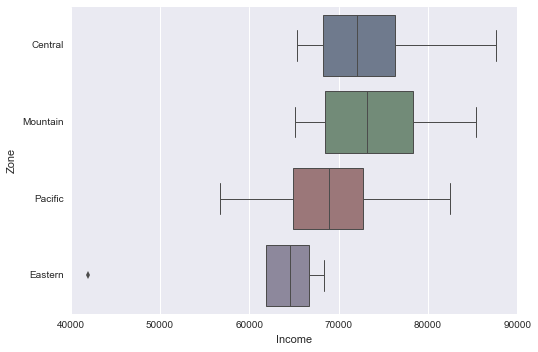

In [7]:
sns.boxplot(hw_df.Income, y=hw_df.Zone, saturation=0.3, linewidth=1)

4. Created a jointplot showing the bivariate distribution of Spending across different zones.

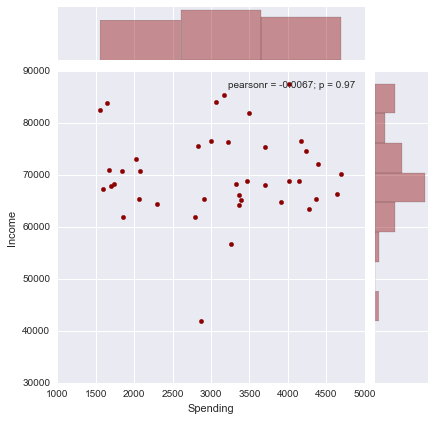

In [8]:
sns.jointplot(x="Spending", y="Income", color="darkred", data=hw_df)

5.Created a boxplot ans swarmplot showing the distribution of Spending across different zones.

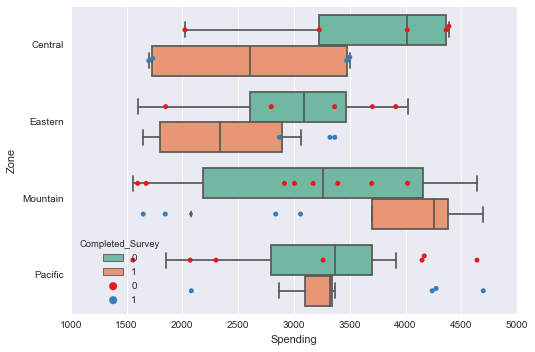

In [9]:
sns.boxplot(x="Spending", y="Zone", data=hw_df, palette="Set2", hue="Completed_Survey")
sns.swarmplot(x="Spending", y="Zone", data=hw_df, split=True, palette="Set1", hue="Completed_Survey", order=["Central", "Eastern","Mountain","Pacific"] )